# Project: Board Slides for FoodWheel

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
How has the average order amount changed over time? What does this say about the trajectory of the company?
How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

We're going to use `pandas` and `matplotlib` for this project.  Import both libraries, under their normal names (`pd` and `plt`).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

## Task 1: What cuisines does FoodWheel offer?
The board wants to make sure that FoodWheel offers a wide variety of restaurants.  Having many different options makes customers more likely to come back.  Let's create pie chart showing the different types of cuisines available on FoodWheel.

Start by loading `restaurants.csv` into a DataFrame called `restaurants`.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

restaurants = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\restaurants.csv')

Inspect `restaurants` using `head`

In [93]:
import pandas as pd
from matplotlib import pyplot as plt

restaurants = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\restaurants.csv')
print(restaurants.head())


   id                name neighborhood  cuisine
0   1          Jongro BBQ      Midtown   Korean
1   2            Pocha 32      Midtown   Korean
2   3  Nom Wah Tea Parlor    Chinatown  Chinese
3   4           Roberta’s     Brooklyn    Pizza
4   5        Speedy Romeo     Brooklyn    Pizza


How many different types of cuisine does FoodWheel offer?
(hint: use `.nunique`)

In [31]:
import pandas as pd
from matplotlib import pyplot as plt

restaurants = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\restaurants.csv')


cuisine_offered = restaurants.cuisine.nunique()
print('Types of cuisine offered: {}'.format(cuisine_offered))

Types of cuisine offered: 7


Let's count the number of restautants of each `cuisine`.  Use `groupby` and `count`.  Save your results to `cuisine_counts`.

In [35]:
import pandas as pd
from matplotlib import pyplot as plt

restaurants = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\restaurants.csv')

cuisine_offered = restaurants.cuisine.nunique()

cuisine_counts = restaurants.groupby(['cuisine']).id.count()
print(cuisine_counts)

types_of_cuisine_offered = restaurants.cuisine.unique()
print(types_of_cuisine_offered)

cuisine_counts_list = cuisine_counts.tolist()
print(cuisine_counts_list)

cuisine_list = types_of_cuisine_offered.tolist()
print(cuisine_list)

# dictionary = dict(zip(keys, values))
cuisine_dictionary = dict(zip(cuisine_list,cuisine_counts_list))
print(cuisine_dictionary)


cuisine
American      10
Chinese       11
Italian        8
Japanese       4
Korean         3
Pizza          4
Vegetarian     4
Name: id, dtype: int64
['Korean' 'Chinese' 'Pizza' 'Vegetarian' 'Italian' 'Japanese' 'American']
[10, 11, 8, 4, 3, 4, 4]
['Korean', 'Chinese', 'Pizza', 'Vegetarian', 'Italian', 'Japanese', 'American']
{'Korean': 10, 'Chinese': 11, 'Pizza': 8, 'Vegetarian': 4, 'Italian': 3, 'Japanese': 4, 'American': 4}


Let's use this information to create a pie chart.  Make sure that your pie chart includes:
- Labels for each cuisine (i.e, "American", "Chinese", etc.)
- Percent labels using `autopct`
- A title
- Use `plt.axis` to make the pie chart a perfect circle
- `plt.show()` to display your chart

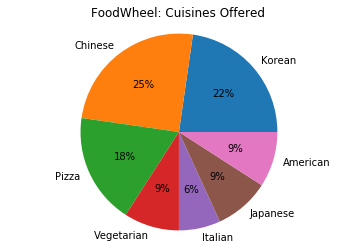

FoodWheel offers 7 different types of cuisines.
 The top 3 cuisines: Chinese, Korean, and Pizza.
 To increase offerings, may want to partner with restaurants that offer: Italian, Japanese, American, and Vegetarian


In [96]:
import pandas as pd
from matplotlib import pyplot as plt

restaurants = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\restaurants.csv')

cuisine_offered = restaurants.cuisine.nunique()

cuisine_counts = restaurants.groupby(['cuisine']).id.count()
types_of_cuisine_offered = restaurants.cuisine.unique()
cuisine_counts_list = cuisine_counts.tolist()
# print('Cuisine Counts in List format {}'.format(cuisine_counts_list))

cuisine_list = types_of_cuisine_offered.tolist()
# print('Cusine Offered in List format {}'.format(cuisine_list))

# dictionary = dict(zip(keys, values))
cuisine_dictionary = dict(zip(cuisine_list,cuisine_counts_list))
# print('Cuisine Counts in Dictionary format {}'.format(cuisine_dictionary))

# plt.figure(figsize=(10,15))
plt.title('FoodWheel: Cuisines Offered')
plt.pie(cuisine_counts, labels= cuisine_list, autopct='%d%%')
plt.axis('equal')
# plt.legend()
plt.show()

print('FoodWheel offers 7 different types of cuisines.\n The top 3 cuisines: Chinese, Korean, and Pizza.\n To increase offerings, may want to partner with restaurants that offer: Italian, Japanese, American, and Vegetarian')

## Task 2: Orders over time
FoodWheel is a relatively new start up.  They launched in April, and have grown more popular since them.  Management suspects that the average order size has increased over time.

Start by loading the data from `orders.csv` into the DataFrame `orders`.

In [85]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

Examine the first few rows of `orders` using `head`.

In [86]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')
print(orders.head())

   id  customer_id       date  price
0   1           61  6-18-2017   13.0
1   2          210   5-8-2017   21.0
2   3            0   9-7-2017   33.0
3   4           66   7-7-2017   19.0
4   5           65  4-26-2017   13.0


Create a new column in `order` called `month` that contains the month that the order was placed.

Hint: The function `split` will split a string on a character.  For instance, if `mydate` is the string `9-26-2017`, then `mydate.split('-')` would return the list `['9', '26', '2017']`.  `mydate.split('-')[0]` would return `'9'`.

In [101]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
print(orders.head())

   id  customer_id       date  price month
0   1           61  6-18-2017   13.0     6
1   2          210   5-8-2017   21.0     5
2   3            0   9-7-2017   33.0     9
3   4           66   7-7-2017   19.0     7
4   5           65  4-26-2017   13.0     4


Group `orders` by `month` and get the average order amount in each `month`.  Save your answer to `avg_order`.

In [108]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
avg_order = orders.groupby(['month']).price.mean().reset_index()
print(avg_order)

  month      price
0     4   9.609195
1     5  14.858824
2     6  15.152174
3     7  18.012821
4     8  21.150685
5     9  29.505882


It looks like the average order is increasing each month.  Great!  We're eventually going to make a bar chart with this information.  It would be nice if our bar chart had error bars.  Calculate the standard deviation for each month using `std`.  Save this to `std_order`.

In [115]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])


avg_order = orders.groupby(['month']).price.mean().reset_index()

std_order = orders.groupby(['month']).price.std().reset_index()
print(std_order)

  month     price
0     4  2.562504
1     5  3.395210
2     6  2.835934
3     7  2.848985
4     8  4.455556
5     9  4.518806


Create a bar chart to share this data.
- The height of each bar should come from `avg_price`
- Use the standard deviations in `std_order` as the `yerr`
- The error capsize should be 5
- Make sure that you label each bar with the name of the month (i.e., 4 = April).
- Also be sure to label the y-axis
- Give your plot a descriptive title

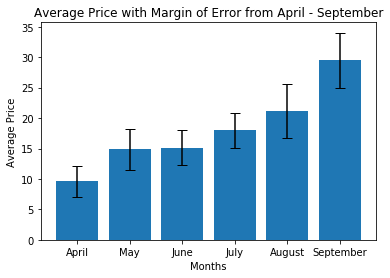

Over time the average order price has increased between April and September showing an overall positive trajectory


In [164]:
from matplotlib import pyplot as plt
import pandas as pd

orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
avg_order = orders.groupby(['month']).price.mean().reset_index()

std_order = orders.groupby(['month']).price.std().reset_index()

error = std_order.price.tolist()

plt.bar(range(len(avg_order)), avg_order.price, yerr=error, capsize=5)

ax = plt.subplot()
ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(['April', 'May','June', 'July', 'August', 'September'])

plt.xlabel('Months')
plt.ylabel('Average Price')

plt.title('Average Price with Margin of Error from April - September')

plt.show()

print('Over time the average order price has increased between April and September showing an overall positive trajectory')

## Task 3: Customer types
There is a range of amounts that customers spend at FoodWheel.  We'd like to create a histogram of the amount spent by each customer over the past six months.

Start by grouping `orders` by `customer_id` and calculating the total amount spent by each customer.  Save your results to `customer_amount`.

In [174]:
import pandas as pd
orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

customer_amount = orders.groupby('customer_id').price.sum().reset_index()
print(customer_amount)

     customer_id  price
0              0   83.0
1              2   11.0
2              3   65.0
3              4   32.0
4              5  119.0
5              6   29.0
6              7   26.0
7              8   56.0
8              9   64.0
9             11   22.0
10            12   31.0
11            13   11.0
12            14   57.0
13            15   17.0
14            16   50.0
15            17  145.0
16            18   53.0
17            19   15.0
18            20   43.0
19            21   15.0
20            22   63.0
21            23   35.0
22            24   14.0
23            25   58.0
24            26   13.0
25            27   38.0
26            28   51.0
27            29   17.0
28            30   15.0
29            32   20.0
..           ...    ...
194          215   52.0
195          218   55.0
196          219   28.0
197          221   22.0
198          222   15.0
199          223   16.0
200          224    9.0
201          226   95.0
202          227   26.0
203          228

Create a histogram of this data.
- The range should be from 0 to 200
- The number of bins should be 40
- Label the x-axis `Total Spent`
- Label the y-axis `Number of Customers`
- Add a titel

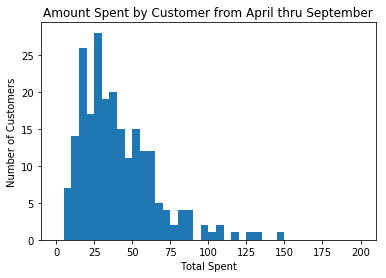

The average FoodWheel customer spends between $15-$40 on orders


In [194]:
import pandas as pd
from matplotlib import pyplot as plt

orders = pd.read_csv(r'C:\Users\Jessica\PycharmProjects\practice\foodwheel\orders.csv')

customer_amount = orders.groupby('customer_id').price.sum().reset_index()
cust_mean = orders.groupby('customer_id').price.mean().reset_index()
cust_median = orders.groupby('customer_id').price.median().reset_index()

plt.hist(customer_amount.price,range=(0,200),bins=40)
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.title('Amount Spent by Customer from April thru September')
plt.show()

print('The average FoodWheel customer spends between $15-$40 on orders')